In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/heart_disease_uci.csv')

## DATASET COLUMNS
* id
* Age (age in years)
* Sex (1 = male; 0 = female)
* dataset
* CP (chest pain type)
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECH (resting electrocardiographic results)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* Num (1,2,3,4 or 0)

In [ ]:
data.head() #first five rows

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data.tail() #last five rows

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


## Column types
* **Numerical** - id, age, trestbps, chol, thalch, oldpeak, ca
* **Categorical** - sex, cp, fbs, exang, slope, thal, num, dataset, restecg
* **Mixed** - none

In [ ]:
columns_summary = pd.DataFrame({
    'DataTypes' : data.dtypes.astype(str)
})
columns_summary

,DataTypes
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


**Question: What are the average and median values of:**
* **Resting blood pressure (trestbps)?**
* **Serum cholesterol (chol)?**
* **Maximum heart rate (thalach)?**

In [ ]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Question: How many rows and columns are in the dataset?**

In [ ]:
data.shape

(920, 16)

**Question: Are there any missing values in the dataset?**

In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


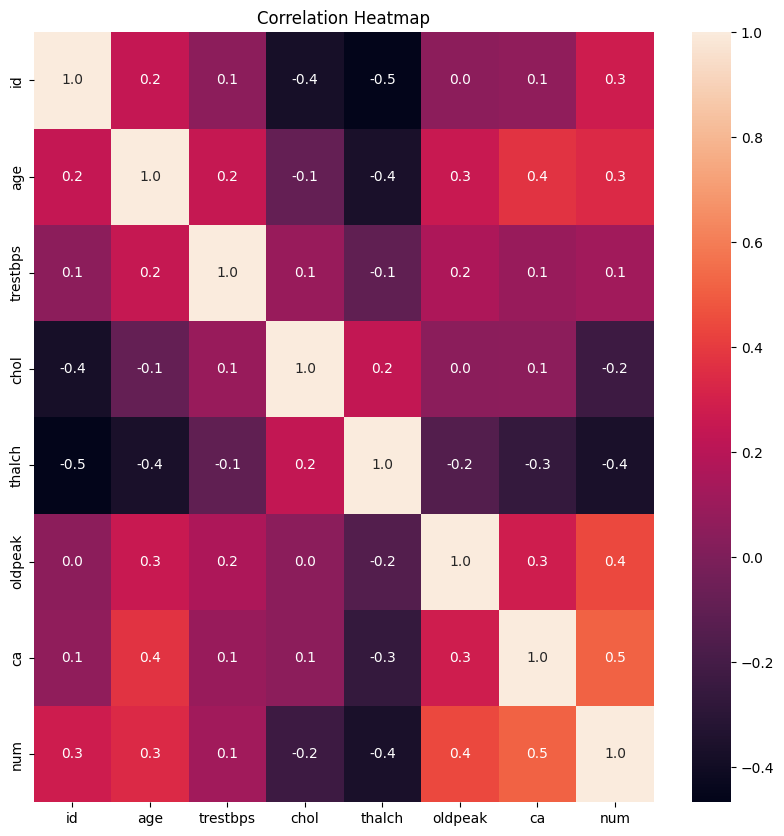

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='.1f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data=data.rename(columns={
    'id': 'Id',
    'age':'Age',
    'dataset':'Dataset',
    'sex':'Sex',
    'cp':'Cp',
    'trestbps':'Trestbps',
    'chol':'Chol',
    'fbs':'Fbs',
    'restecg':'Restecg',
    'thalch':'Thalch',
    'exang':'Exang',
    'oldpeak':'Oldpeak',
    'slope':'Slope',
    'ca':'Ca',
    'thal':'Thal',
    'num':'Num'})

In [ ]:
data.sample(10)

,Id,Age,Sex,Dataset,Cp,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Ca,Thal,Num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3
117,118,35,Female,Cleveland,asymptomatic,138.0,183.0,False,normal,182.0,False,1.4,upsloping,0.0,normal,0
133,134,51,Male,Cleveland,asymptomatic,140.0,261.0,False,lv hypertrophy,186.0,True,0.0,upsloping,0.0,normal,0
226,227,47,Male,Cleveland,asymptomatic,112.0,204.0,False,normal,143.0,False,0.1,upsloping,0.0,normal,0
490,491,62,Male,Hungary,atypical angina,140.0,271.0,False,normal,152.0,False,1.0,upsloping,NaN,NaN,0
741,742,64,Male,VA Long Beach,asymptomatic,120.0,0.0,True,st-t abnormality,106.0,False,2.0,flat,NaN,NaN,1
834,835,50,Male,VA Long Beach,asymptomatic,NaN,218.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,1
184,185,60,Female,Cleveland,asymptomatic,158.0,305.0,False,lv hypertrophy,161.0,False,0.0,upsloping,0.0,normal,1
39,40,61,Male,Cleveland,non-anginal,150.0,243.0,True,normal,137.0,True,1.0,flat,0.0,normal,0
584,585,44,Male,Hungary,asymptomatic,135.0,491.0,False,normal,135.0,False,0.0,NaN,NaN,NaN,1


### Age Analysis

#### Conclusions:
The age distribution peaks around 53-54 years, suggesting that midlife individuals are at a higher risk of heart disease.

In [ ]:
data.Age.value_counts()

,count
Age,
54,51
58,43
55,41
56,38
57,38
52,36
62,35
51,35
59,35


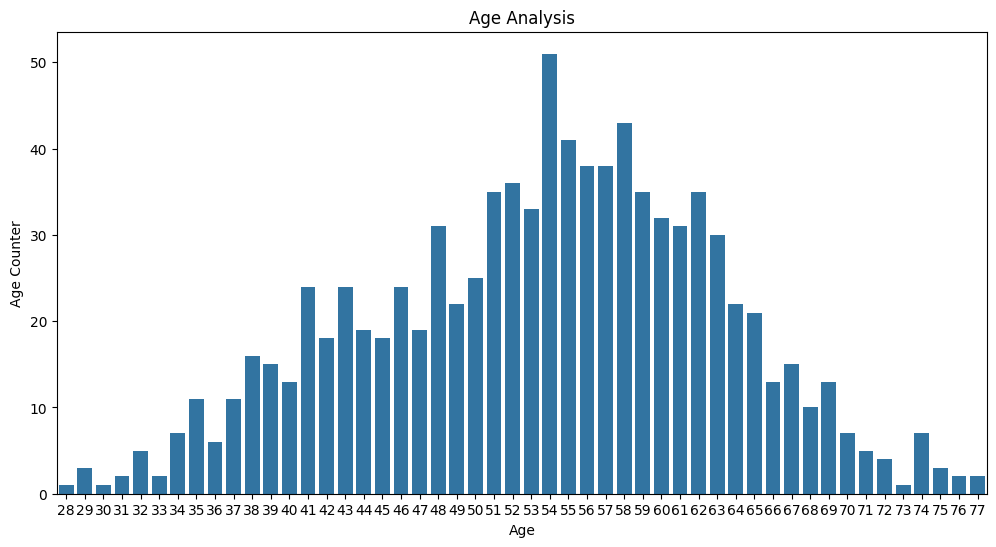

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=data.Age.value_counts().index,y=data.Age.value_counts().values)
plt.xlabel("Age")
plt.ylabel("Age Counter")
plt.title("Age Analysis")
plt.show()

In [ ]:
print(min(data.Age))
print(max(data.Age))
print(data.Age.mean())

28
77
53.51086956521739


In [ ]:
#Age category
young_ages = data[(data.Age>=28)&(data.Age<40)]
middle_ages = data[(data.Age>=40)&(data.Age<55)]
elderly_ages = data[(data.Age>=55)]
print(len(young_ages))
print(len(middle_ages))
print(len(elderly_ages))

80
392
448


In [ ]:
data['Age'].describe()

,Age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


<Axes: ylabel='Density'>

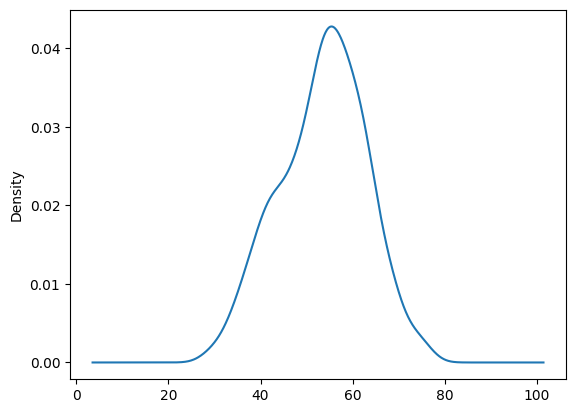

In [ ]:
data['Age'].plot(kind='kde')

In [ ]:
data['Age'].skew()

-0.195993861608106

**Question: What is the age range of patients in the dataset?**

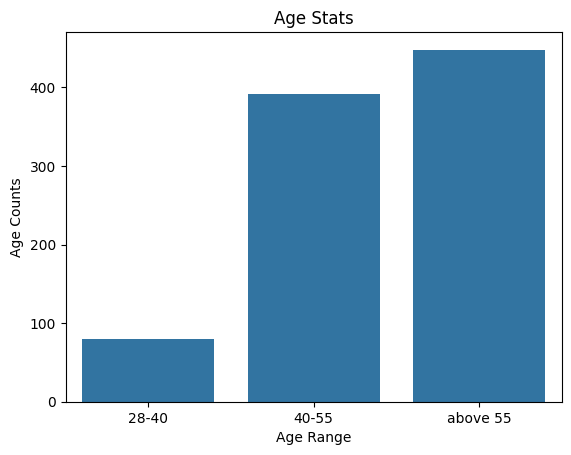

In [ ]:
sns.barplot(x=['28-40','40-55','above 55'],
            y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Age Stats')
plt.show()


**Question: Plot the age distribution of the patients.**

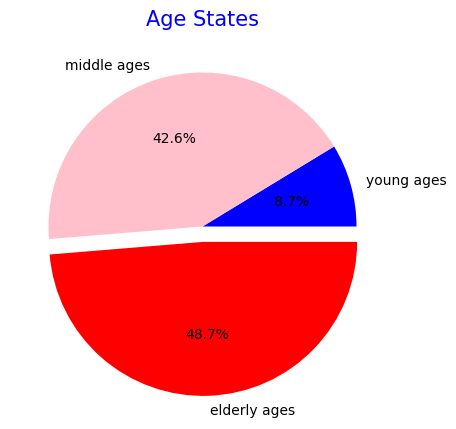

In [ ]:
colors = ['blue','pink','red']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],
        explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

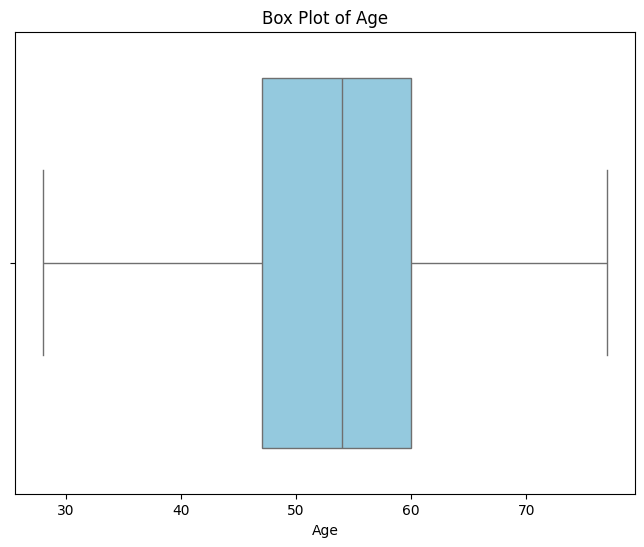

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data,x='Age', color='skyblue')
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

### Gender Analysis

#### Conclusions:
The dataset shows that males are more frequently represented in higher severity levels (num > 0) compared to females.

In [ ]:
counts = data.Sex.value_counts()
counts

,count
Sex,
Male,726
Female,194


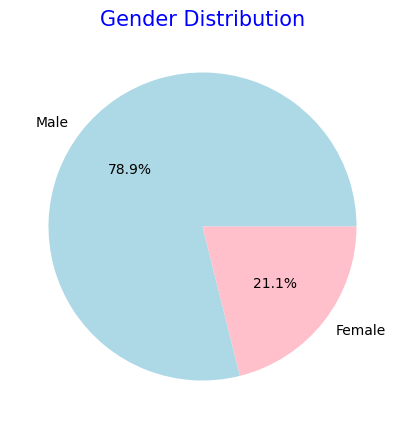

In [ ]:
plt.figure(figsize = (5,5))
counts.plot.pie(autopct="%1.1f%%",colors = ['lightblue','pink'],labels = ['Male','Female'])
plt.title('Gender Distribution',color = 'blue',fontsize = 15)
plt.ylabel('')
plt.show()

### Chest Pain Type(CP) Analysis

#### Conclusions:
Chest pain type (cp) has distinct categories such as typical angina, atypical angina, and asymptomatic cases. These are key indicators of cardiovascular stress.

In [ ]:
data.sample(5)

,Id,Age,Sex,Dataset,Cp,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Ca,Thal,Num
705,706,65,Male,Switzerland,asymptomatic,145.0,0.0,NaN,st-t abnormality,67.0,False,NaN,NaN,NaN,fixed defect,3
192,193,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,flat,NaN,reversable defect,1
108,109,61,Male,Cleveland,asymptomatic,120.0,260.0,False,normal,140.0,True,3.6,flat,1.0,reversable defect,2
487,488,61,Female,Hungary,asymptomatic,130.0,294.0,False,st-t abnormality,120.0,True,1.0,flat,NaN,NaN,0
372,373,44,Male,Hungary,atypical angina,130.0,215.0,False,normal,135.0,False,0.0,NaN,NaN,NaN,0


**Question: What are the counts of different chest pain types (cp)?**

In [ ]:
data.Cp.value_counts()

,count
Cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


<ipython-input-29-6779d1224bf8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,x='Cp',palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

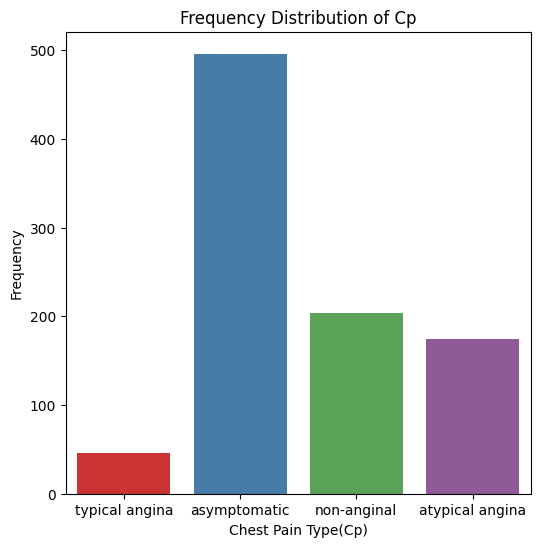

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data,x='Cp',palette='Set1')
plt.title("Frequency Distribution of Cp")
plt.xlabel("Chest Pain Type(Cp)")
plt.ylabel("Frequency")
plt.show

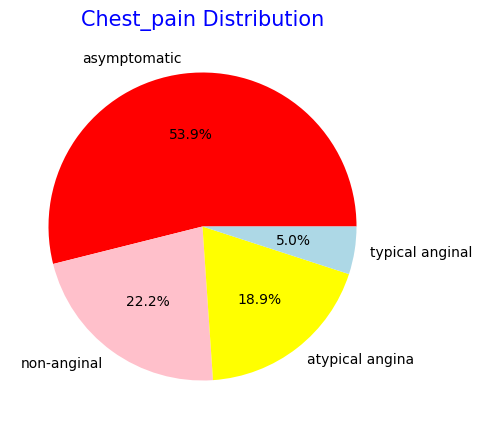

In [ ]:
counts = data.Cp.value_counts()
plt.figure(figsize = (5,5))
counts.plot.pie(autopct="%1.1f%%",colors = ['red','pink','yellow','lightblue'],
                labels = ['asymptomatic','non-anginal','atypical angina','typical anginal'])
plt.title('Chest_pain Distribution',color = 'blue',fontsize = 15)
plt.ylabel('')
plt.show()

### TRESTBPS Analysis

#### Conclusions:
The average resting blood pressure (trestbps) is approximately 132 mmHg, with most values ranging between 120 and 140 mmHg.

In [ ]:
data.sample(5)

,Id,Age,Sex,Dataset,Cp,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Ca,Thal,Num
60,61,51,Female,Cleveland,asymptomatic,130.0,305.0,False,normal,142.0,True,1.2,flat,0.0,reversable defect,2
810,811,75,Male,VA Long Beach,asymptomatic,136.0,225.0,False,normal,112.0,True,3.0,flat,NaN,NaN,3
70,71,65,Female,Cleveland,non-anginal,155.0,269.0,False,normal,148.0,False,0.8,upsloping,0.0,normal,0
399,400,48,Female,Hungary,asymptomatic,150.0,227.0,False,normal,130.0,True,1.0,flat,NaN,NaN,0
630,631,51,Male,Switzerland,asymptomatic,130.0,0.0,NaN,st-t abnormality,163.0,False,0.0,NaN,NaN,reversable defect,1


In [ ]:
data.Trestbps.mean()

132.13240418118468

In [ ]:
data.Trestbps.median()

130.0

In [ ]:
data.Trestbps.mode()

,Trestbps
0,120.0


In [ ]:
data.Trestbps.value_counts()

,count
Trestbps,
120.0,131
130.0,115
140.0,102
110.0,59
150.0,56
...,...
164.0,1
101.0,1
174.0,1


**Question: Are there any outliers in resting blood pressure (trestbps)?**

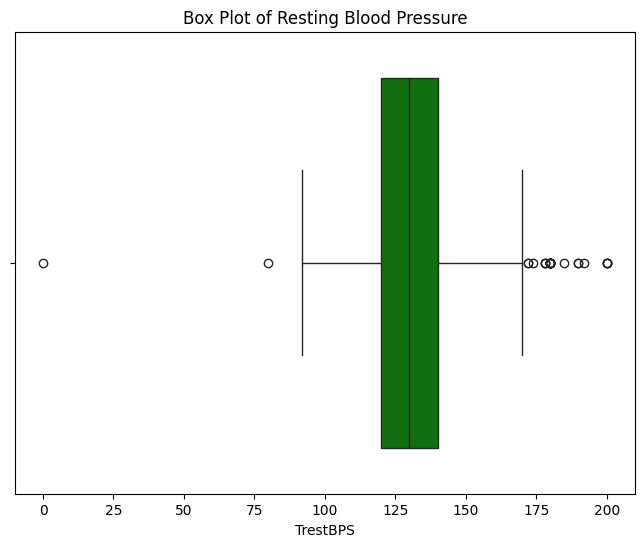

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data,x='Trestbps', color='green')
plt.title("Box Plot of Resting Blood Pressure")
plt.xlabel("TrestBPS")
plt.show()

### CHOL (serum cholestoral in mg/dl) Analysis

#### Conclusions:
The average cholesterol level (chol) is about 199 mg/dL, with a wide range, indicating potential outliers or varying cholesterol patterns in the dataset.

In [ ]:
print(data.Chol.mean())
print(data.Chol.min())
print(data.Chol.max())

199.13033707865168
0.0
603.0


In [ ]:
data.Chol.value_counts()

,count
Chol,
0.0,172
220.0,10
254.0,10
223.0,9
230.0,9
...,...
360.0,1
412.0,1
358.0,1


**Question: Are there any outliers in cholesterol (chol)?**

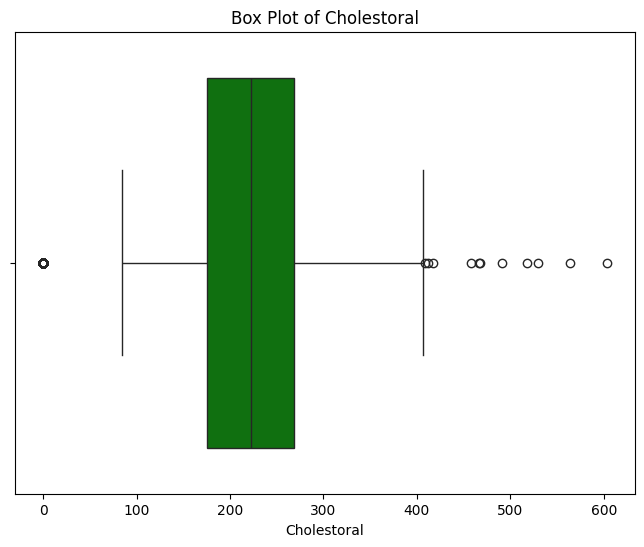

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data,x='Chol', color='green')
plt.title("Box Plot of Cholestoral")
plt.xlabel("Cholestoral")
plt.show()

### EXANG (exercise induced angina (1 = yes; 0 = no))

#### Conclusions:
Many individuals with exercise-induced angina (exang = 1) are classified as asymptomatic under the chest pain category, highlighting a potential relationship between these variables.

**Question: How many patients have exercise-induced angina (exang)?**

In [ ]:
data.Exang.value_counts()

,count
Exang,
False,528
True,337


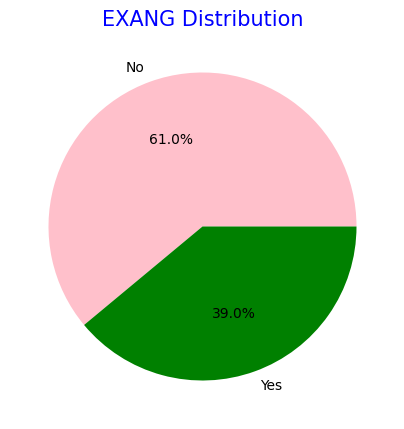

In [ ]:
counts = data.Exang.value_counts()
plt.figure(figsize = (5,5))
counts.plot.pie(autopct="%1.1f%%",colors = ['pink','green'],labels = ['No','Yes'])
plt.title('EXANG Distribution',color = 'blue',fontsize = 15)
plt.ylabel('')
plt.show()

### Target Variable (num)

**Question: How many patients have heart disease, and how many don’t?**

In [ ]:
counts = data.Num.value_counts()
print(counts)

Num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


**Question: What is the distribution of the target variable (presence of heart disease: 0 or 1)?**

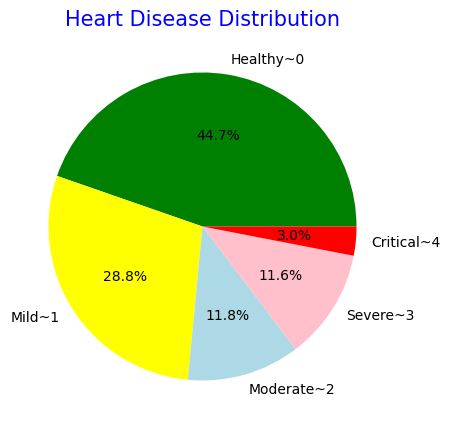

In [ ]:
plt.figure(figsize = (5,5))
counts.plot.pie(autopct="%1.1f%%",colors = ['green','yellow','lightblue','pink','red'],
                labels = ['Healthy~0','Mild~1','Moderate~2','Severe~3','Critical~4'])
plt.title('Heart Disease Distribution',color = 'blue',fontsize = 15)
plt.ylabel('')
plt.show()

In [ ]:
data['age_group'] = pd.cut(data['Age'], bins=[28, 40, 55, 100], labels=['28-39', '40-54', '55+'])

<ipython-input-67-a29c066d23a9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby('age_group')['Num'].value_counts().unstack()


<Figure size 1000x600 with 0 Axes>

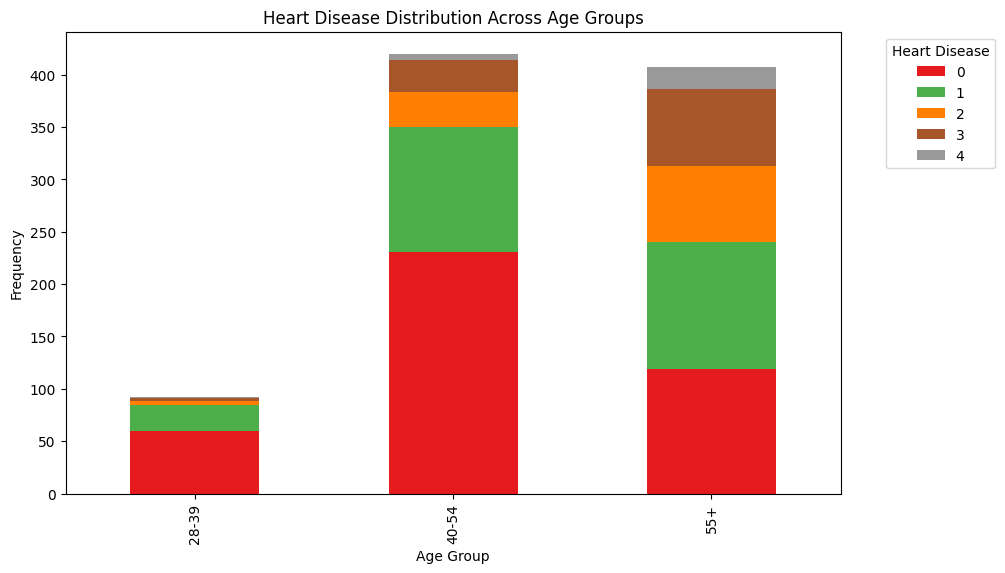

In [ ]:
counts = data.groupby('age_group')['Num'].value_counts().unstack()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')
plt.title("Heart Disease Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.legend(title="Heart Disease", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

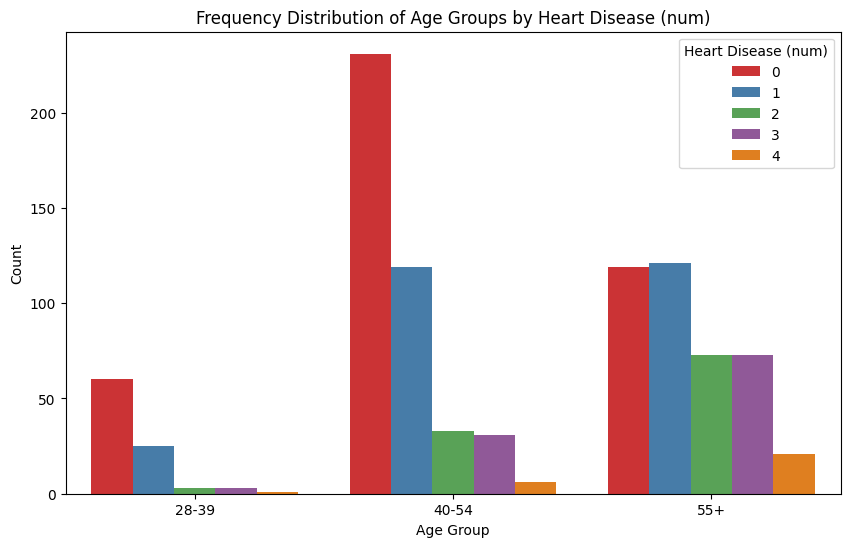

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data= data, x='age_group', hue='Num', palette='Set1')
plt.title("Frequency Distribution of Age Groups by Heart Disease (num)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Heart Disease (num)")
plt.show()

**Question: Compare the average cholesterol levels between patients with and without heart disease.**

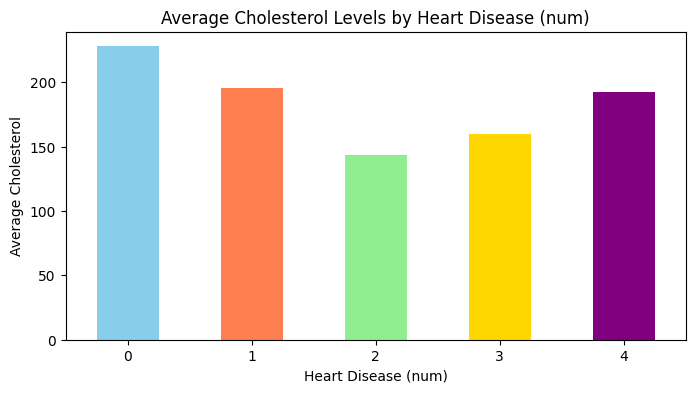

In [ ]:
counts = data.groupby('Num')['Chol'].mean()
plt.figure(figsize=(8, 4))
counts.plot(kind='bar', color=['skyblue', 'coral', 'lightgreen', 'gold', 'purple'])
plt.title("Average Cholesterol Levels by Heart Disease (num)")
plt.xlabel("Heart Disease (num)")
plt.ylabel("Average Cholesterol")
plt.xticks(rotation=0)
plt.show()